In [2]:
library(readxl)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
idf <- read.csv("income data.csv")
cdf <- read_xlsx("crime rate data.xlsx")

head(idf)
head(cdf)

,Region,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,X,X.1,X.2,X.3,X.4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Alberni Clayoquot,"68,420","68,630","69,880","72,500","74,500",NA,NA,NA,NA,NA
2,Capital,"99,810","101,220","103,010","104,250","106,550",NA,NA,NA,NA,NA
3,Cariboo,"80,592","80,066","83,317","85,522","85,415",NA,NA,NA,NA,NA
4,Central Kootenay,,"74,380","77,510","79,820","82,160",NA,NA,NA,NA,NA
5,Central Okanagan,"82,000","83,100","87,060","88,890","91,690",NA,NA,NA,NA,NA
6,Columbia Shuswap,"74,410","75,320","78,730","80,580","83,010",NA,NA,NA,NA,NA


REGION,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberni Clayoquot,98.76193,100.56679,96.47319,112.92377,138.41150
Capital,57.53442,54.02410,52.51044,56.98354,65.19813
Cariboo,108.37384,103.92038,98.20793,105.77529,136.54883
Central Kootenay,58.86374,56.16195,57.12425,55.65332,60.24604
Central Okanagan,81.21511,81.86729,79.01776,86.56440,106.85574
Columbia Shuswap,56.18160,52.02519,48.16129,51.70925,63.82898


In [4]:
idf <- subset(idf, select = -c(X, X.1, X.2, X.3, X.4))

head(idf)

,Region,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alberni Clayoquot,"68,420","68,630","69,880","72,500","74,500"
2,Capital,"99,810","101,220","103,010","104,250","106,550"
3,Cariboo,"80,592","80,066","83,317","85,522","85,415"
4,Central Kootenay,,"74,380","77,510","79,820","82,160"
5,Central Okanagan,"82,000","83,100","87,060","88,890","91,690"
6,Columbia Shuswap,"74,410","75,320","78,730","80,580","83,010"


In [5]:
cdf <- rename(cdf, Region = REGION)

In [6]:
head(cdf)
head(idf)

Region,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberni Clayoquot,98.76193,100.56679,96.47319,112.92377,138.41150
Capital,57.53442,54.02410,52.51044,56.98354,65.19813
Cariboo,108.37384,103.92038,98.20793,105.77529,136.54883
Central Kootenay,58.86374,56.16195,57.12425,55.65332,60.24604
Central Okanagan,81.21511,81.86729,79.01776,86.56440,106.85574
Columbia Shuswap,56.18160,52.02519,48.16129,51.70925,63.82898


,Region,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alberni Clayoquot,"68,420","68,630","69,880","72,500","74,500"
2,Capital,"99,810","101,220","103,010","104,250","106,550"
3,Cariboo,"80,592","80,066","83,317","85,522","85,415"
4,Central Kootenay,,"74,380","77,510","79,820","82,160"
5,Central Okanagan,"82,000","83,100","87,060","88,890","91,690"
6,Columbia Shuswap,"74,410","75,320","78,730","80,580","83,010"


In [7]:
cdf <- pivot_longer(cdf, cols = starts_with("Year"), names_to = "Year", values_to = "CrimeRate")
idf <- pivot_longer(idf, cols = starts_with("Year"), names_to = "Year", values_to = "Income")

In [8]:
head(cdf)
head(idf)

Region,Year,CrimeRate
<chr>,<chr>,<dbl>
Alberni Clayoquot,Year_2015,98.76193
Alberni Clayoquot,Year_2016,100.56679
Alberni Clayoquot,Year_2017,96.47319
Alberni Clayoquot,Year_2018,112.92377
Alberni Clayoquot,Year_2019,138.41150
Capital,Year_2015,57.53442


Region,Year,Income
<chr>,<chr>,<chr>
Alberni Clayoquot,Year_2015,"68,420"
Alberni Clayoquot,Year_2016,"68,630"
Alberni Clayoquot,Year_2017,"69,880"
Alberni Clayoquot,Year_2018,"72,500"
Alberni Clayoquot,Year_2019,"74,500"
Capital,Year_2015,"99,810"


In [9]:
tdata <- merge(cdf, idf, by = c("Region", "Year"))

In [10]:
head(tdata)

,Region,Year,CrimeRate,Income
,<chr>,<chr>,<dbl>,<chr>
1,Alberni Clayoquot,Year_2015,98.76193,"68,420"
2,Alberni Clayoquot,Year_2016,100.56679,"68,630"
3,Alberni Clayoquot,Year_2017,96.47319,"69,880"
4,Alberni Clayoquot,Year_2018,112.92377,"72,500"
5,Alberni Clayoquot,Year_2019,138.41150,"74,500"
6,Capital,Year_2015,57.53442,"99,810"


In [11]:
tdata$Year <- sub("Year_", "", tdata$Year)

In [12]:
head(tdata)

,Region,Year,CrimeRate,Income
,<chr>,<chr>,<dbl>,<chr>
1,Alberni Clayoquot,2015,98.76193,"68,420"
2,Alberni Clayoquot,2016,100.56679,"68,630"
3,Alberni Clayoquot,2017,96.47319,"69,880"
4,Alberni Clayoquot,2018,112.92377,"72,500"
5,Alberni Clayoquot,2019,138.41150,"74,500"
6,Capital,2015,57.53442,"99,810"


In [13]:
tdata$Income <- gsub(",", "", tdata$Income) # remove commas

In [14]:
tdata$Income <- as.numeric(tdata$Income)

In [15]:
head(tdata)

,Region,Year,CrimeRate,Income
,<chr>,<chr>,<dbl>,<dbl>
1,Alberni Clayoquot,2015,98.76193,68420
2,Alberni Clayoquot,2016,100.56679,68630
3,Alberni Clayoquot,2017,96.47319,69880
4,Alberni Clayoquot,2018,112.92377,72500
5,Alberni Clayoquot,2019,138.41150,74500
6,Capital,2015,57.53442,99810


In [16]:
tdata$Year <- as.numeric(tdata$Year)

In [17]:
threshold <- median(tdata$CrimeRate)  #set median as threshold for high-low crime level
threshold

[1] 82.67274

In [18]:
tdata$CrimeLevel <- ifelse(tdata$CrimeRate > threshold, 1, 0)   #1 is high crime rate and 0 is low

In [19]:
training_set <- subset(tdata, Year >= 2015 & Year <= 2018)
test_set <- subset(tdata, Year == 2019)

In [20]:
head(training_set)
head(test_set)

,Region,Year,CrimeRate,Income,CrimeLevel
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alberni Clayoquot,2015,98.76193,68420,1
2,Alberni Clayoquot,2016,100.56679,68630,1
3,Alberni Clayoquot,2017,96.47319,69880,1
4,Alberni Clayoquot,2018,112.92377,72500,1
6,Capital,2015,57.53442,99810,0
7,Capital,2016,54.02410,101220,0


,Region,Year,CrimeRate,Income,CrimeLevel
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5,Alberni Clayoquot,2019,138.41150,74500,1
10,Capital,2019,65.19813,106550,0
15,Cariboo,2019,136.54883,85415,1
20,Central Kootenay,2019,60.24604,82160,0
25,Central Okanagan,2019,106.85574,91690,1
30,Columbia Shuswap,2019,63.82898,83010,0


In [21]:
logistic_model <- glm(CrimeLevel ~ Income + as.factor(Region), data = training_set, family = "binomial")

summary(logistic_model)


Call:
glm(formula = CrimeLevel ~ Income + as.factor(Region), family = "binomial", 
    data = training_set)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.62363  -0.00003  -0.00002   0.00003   1.87666  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                            3.013e+01  1.458e+04   0.002    0.998
Income                                -1.224e-04  1.527e-04  -0.802    0.423
as.factor(Region)Capital              -3.922e+01  2.061e+04  -0.002    0.998
as.factor(Region)Cariboo               1.544e+00  2.059e+04   0.000    1.000
as.factor(Region)Central Kootenay     -4.227e+01  2.224e+04  -0.002    0.998
as.factor(Region)Central Okanagan     -2.082e+01  1.458e+04  -0.001    0.999
as.factor(Region)Columbia Shuswap     -4.227e+01  2.058e+04  -0.002    0.998
as.factor(Region)Comox Valley         -4.201e+01  2.055e+04  -0.002    0.998
as.factor(Region)Cowichan Valley      -4.257e+01  2.057e+04

In [22]:
test_set$predicted_CrimeLevel <- predict(logistic_model, newdata = test_set, type = "response")

In [23]:
test_set$predicted_CrimeLevel <- ifelse(test_set$predicted_CrimeLevel >= 0.5, 1, 0)

In [24]:
comparison <- data.frame(
    Actual_CrimeLevel = test_set$CrimeLevel,
    Predicted_CrimeLevel = test_set$predicted_CrimeLevel
)

print(comparison)

   Actual_CrimeLevel Predicted_CrimeLevel
1                  1                    1
2                  0                    0
3                  1                    1
4                  0                    0
5                  1                    0
6                  0                    0
7                  0                    0
8                  1                    0
9                  0                    0
10                 1                    1
11                 1                    1
12                 1                    1
13                 0                    0
14                 1                    0
15                 1                    1
16                 1                    0
17                 1                    1
18                 1                    0
19                 1                    0
20                 0                    0
21                 1                    1
22                 1                    1


`geom_smooth()` using formula = 'y ~ x'


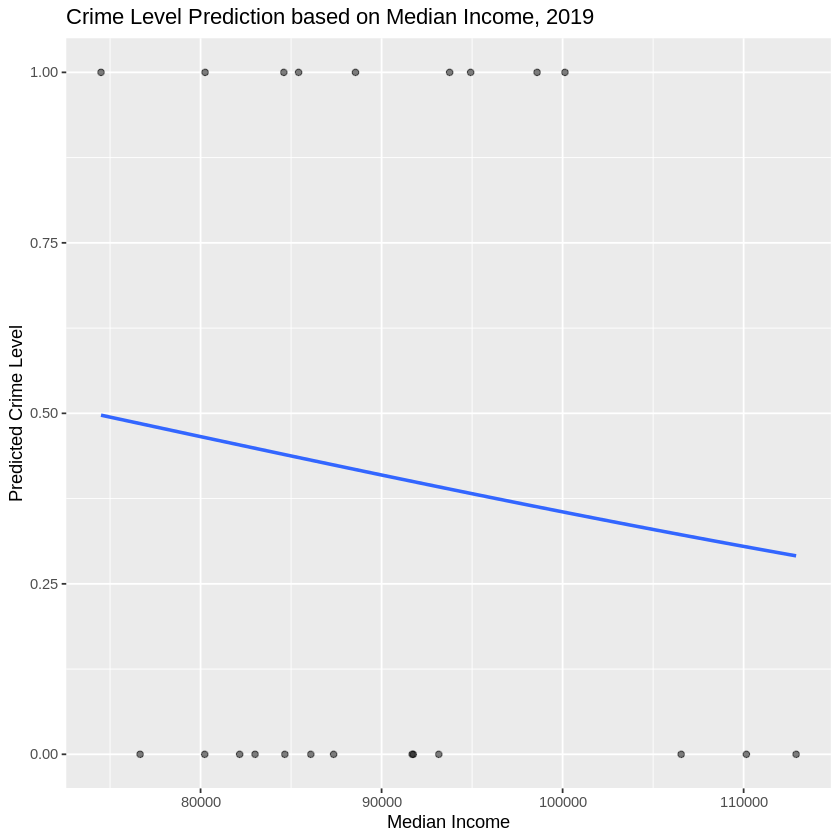

In [29]:
ggplot(test_set, aes(x=Income, y=predicted_CrimeLevel)) +
  geom_point(alpha=.5) +
  labs(title = "Crime Level Prediction based on Median Income, 2019", x = "Median Income", y = "Predicted Crime Level") +
  geom_smooth(method="glm", se=FALSE, method.args = list(family=binomial))